# Generative Models

Generative models are a type of artificial intelligence (AI) that **learn the underlying structure of data** and use it to create **new, realistic samples**. 

These models can generate:
- **Text** (e.g., GPT, ChatGPT, Bard)
- **Images** (e.g., Stable Diffusion, Midjourney, DALL·E)
- **Music & Audio** (e.g., Jukebox, AudioLM)
- **Video & 3D Models** (e.g., RunwayML, NVIDIA StyleGAN)

Unlike **discriminative models**, which classify data (e.g., "Is this a cat or a dog?"), **generative models** create entirely new samples based on patterns they have learned.


### Classifying vs. Generating: A "Cats vs. Dogs" Example

Imagine we train an AI model to recognize images of **cats** and **dogs**.

1. **Discriminative Model (Classification)**
    - The AI looks at an image and predicts **"cat" or "dog"**.
    - It does this by learning patterns in pixel values and deciding which category is more likely.


2. **Generative Model**
   - Instead of just recognizing cats and dogs, a **generative model** learns the full probability distribution of what cat and dog images look like.
   - It then **generates entirely new images** that resemble real cats and dogs, even if they have never been seen before.

#### From Classification to Generation
- **Discriminative models** focus on **decision boundaries** (e.g., "This image is more likely a cat than a dog").
- **Generative models** learn how the entire dataset is structured and can **create new examples** that fit the learned patterns.

This ability to use **model distributions** is what allows generative AI to create **new text, images, and music** that seem real.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/how-to-do-Cat-and-Dog-Classification-using-CNN_-How-to-do-Cat-and-Dog-Classification-using-CNN_-01-scaled.jpg)

## Types of Generative Models

| Model Type | How It Works | Pros | Cons | Example Applications |
|------------|-------------|------|------|----------------------|
| **VAEs** | Encode data into a latent space and decode it | Simple, interpretable | Lower-quality outputs | Handwritten digit generation |
| **GANs** | Competing networks generate and evaluate data | High-quality images | Unstable training | Deepfake images, AI art |
| **Normalizing Flows** | Transform distributions via invertible functions | Exact likelihood computation | Less scalable | Density estimation |
| **Diffusion Models** | Learn to reverse a noise-adding process | Excellent sample quality | Slow generation speed | Stable Diffusion, DALL·E 2 |
| **Transformers** | Generate sequences with attention mechanisms | Best for text generation | Computationally expensive | ChatGPT, DALL·E |

#### Variational Autoencoders (VAEs)
- VAEs learn to **compress** data into a low-dimensional space (called a **latent space**) and then **reconstruct it** back to the original form.
- They add a **random noise component** to ensure the model learns a flexible and smooth latent space.

#### Generative Adversarial Networks (GANs)
- GANs use two networks:
  - A **Generator** that creates fake images.
  - A **Discriminator** that tries to distinguish real images from fake ones.
- The **Generator** improves by continuously trying to "fool" the Discriminator.

#### Normalizing Flows
- These models transform **simple distributions (like Gaussian noise)** into **complex distributions** using a series of **invertible** transformations.
- The key idea is that every transformation keeps track of how probabilities change, so **exact likelihoods** can be computed.

#### Diffusion Models
- Inspired by **thermodynamic diffusion**, these models add noise to data step by step until it becomes **pure noise**.
- The model **learns to reverse this process**, gradually refining noisy data into realistic images.

#### Transformers (Large-Scale Generative Models)
- Transformers, such as **GPT-4, ChatGPT, and BERT**, use **self-attention** mechanisms to **generate coherent text**.
- When used for images, transformers generate **pixels or patches sequentially**, leading to models like **DALL·E and Imagen**.

---

# Normalizing Flows

Normalizing Flows are a type of generative model that let us turn something simple—like random noise—into something much more complex, like realistic images, speech, or other types of data.

They work by applying a series of carefully designed transformations that reshape the probability distribution of simple data (like Gaussian noise) into a more complex distribution that matches real-world data through a sequence of **invertible and differentiable transformations**.

A key advantage of Normalizing Flows is their ability to **explicitly compute the likelihood** of generated data, unlike other generative models such as GANs (which rely on implicit density estimation) or VAEs (which use an approximate density).


## What is a Normalizing Flow?

A **Normalizing Flow** consists of a series of transformations that map a simple probability distribution (e.g., a standard normal distribution) to a complex target distribution. This is achieved using a sequence of **invertible and differentiable** functions.

Let’s say we start with a very simple distribution—for example, a bell-shaped curve called a standard normal distribution. It’s easy to sample from, but too simple to represent complex data like pictures of cats or recordings of human voices.

Normalizing Flows take that simple distribution and apply a series of reversible (invertible) steps to reshape it into a much more detailed, expressive distribution that can model real-world data.


### Intuition Behind Normalizing Flows
Imagine you have a simple Gaussian noise variable:

$$
z_0 \sim \mathcal{N}(0, I)
$$

where $z_0$ is drawn from a standard normal distribution. If we apply a sequence of **bijective (invertible) transformations**:

$$
z_k = f_k \circ f_{k-1} \circ \dots \circ f_1 (z_0)
$$

we obtain a transformed variable $z_k$ that follows a new, more complex probability distribution. The key advantage is that we can compute the probability density of \(z_k\) exactly using the **change of variables formula**.

### Why are Normalizing Flows Important?
- **Exact Likelihood Computation** – Unlike GANs or VAEs, normalizing flows allow **exact likelihood evaluation**, which is useful for training and optimization.
- **Efficient Sampling** – Sampling is straightforward since we can map from a simple distribution to a complex one (and vice versa).
- **Flexible Modeling** – By stacking multiple transformations, we can approximate arbitrarily complex distributions.

![](https://tikz.net/janosh/normalizing-flow.png)

## Element-Wise Operations and Shuffle Layers 

Normalizing Flows juggle two seemingly opposite goals:

1. **Stay invertible** -- so we can always work backward and compute exact probabilities.
2. **Be expressive** -- so the model can capture complicated relationships in real data.

They achieve this balance by combining **element‑wise operations**—which are easy to reverse—with **shuffle layers**, which cleverly mix information across dimensions.

### Element-Wise Operation Layers

These layers apply **invertible functions independently to each dimension** of the input. They are computationally efficient and ensure that the transformation remains tractable.

In simpler terms, they: 
  - Apply an **invertible function to each component separately** (dimension‑by‑dimension).  
  - And, because each component is handled on its own, the math stays simple and the Jacobian determinant (needed for likelihoods) is easy to compute.
  - With this, they give us non‑linear power **without breaking invertibility** or adding heavy computation.

#### Scaling & Translation (Affine Coupling)
  - Many normalizing flows, like **RealNVP and Glow**, use affine coupling layers, which perform element-wise transformations:
  
    $$
    x_A = x_A \odot \exp(s(x_B)) + t(x_B)
    $$

    where:
    - $ x_A, x_B $ are partitions of the input.
    - $ s(x_B) $ and $ t(x_B) $ are learned scaling and translation functions.

  - Since the transformation only depends on part of the input ($ x_B $), it remains **invertible** while allowing complex dependencies.
  - In simpler terms, this approach locks half the variables in place, tweaks the other half with a simple formula, then swaps roles for next layer. Over several layers every variable gets plenty of non‑linear attention, yet each step is still easy to “undo.”
  
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnLYTQGhWX9aZdCKPbS0Sqq9j68o1o8Vcfch4BEs4R-1TIjcXpz94YelanqwgTcsf1Uho&usqp=CAU![image.png](attachment:image.png))

#### Element‑Wise Non‑Linearities (Planar & Radial Flows)
- Simple element-wise activation functions, such as **tanh** and **sigmoid**, can be used to introduce non-linearity in the transformation.
- Planar and radial flows use functions like:

$$
z' = z + u \;\tanh\!\bigl(w^\top z + b\bigr)
$$

- $u, w, b$ are small sets of learnable parameters.  
- $\tanh$ (or similar) injects non‑linearity *per sample*, but the transformation is still invertible under mild conditions.  
- The Jacobian determinant reduces to a simple formula involving $u$ and $w$, so we can compute it quickly.


### Shuffle Layers

A key limitation of element-wise operations is that they apply transformations independently to each dimension, which **limits how dependencies between dimensions can be learned**. 

To address this, **shuffle layers** are used to **rearrange dimensions between transformations**, making the overall flow more expressive.

In short, after an element‑wise layer, each coordinate only “talks” to itself. Shuffling rearranges coordinates so **the next element‑wise layer acts on a different mix of variables**, letting the overall flow learn cross‑dimension dependencies.

#### Common Shuffling Strategies

| Approach | How it works | Pros | Cons |
|----------|--------------|------|------|
| **Fixed Permutation** | Randomly reorder dimensions at each step. | Simple, zero extra parameters. | Not learnable; might be sub‑optimal. |
| **Invertible 1×1 Convolution** (Glow) | Multiply by a learned square matrix \(W\): \(x' = W x\). \(W\) is constrained to stay invertible, and its log‑determinant is tractable. | Learnable mixing; captures richer correlations. | Slightly higher compute than a fixed shuffle. |
| **Checkerboard / Channel‑Wise Splits** (RealNVP for images) | For images, alternate between pixel positions (checkerboard) or color channels. | Exploits image structure; keeps implementation simple. | Tied to a specific data layout (images). |



## Invertibility and Bijectivity in Normalizing Flows

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjQmSDyCnxhL8DLy0EcoXqaWX_Mpvqa32LFQ&s)

### What Does Invertible Mean?

A function $ f $ is **invertible** if there exists another function $ f^{-1} $ that "undoes" the effect of $ f $. This means that applying $ f^{-1} $ after $ f $ brings us back to the original input:

$$
f^{-1}(f(x)) = x, \quad \forall x \in \text{domain of } f
$$

In Normalizing Flows, we start with a simple probability distribution (e.g., Gaussian) and transform it into a complex one using a sequence of functions. Since we need to compute the probability density of transformed variables, the transformations must be **invertible** so we can move back and forth between the simple and complex distributions.

- **Forward Transformation:** $ z_k = f(z_0) $
- **Inverse Transformation:** $ z_0 = f^{-1}(z_k) $

If $ f $ is not invertible, we **lose information** when transforming the data, making it impossible to go back to the original distribution.


### What Does Bijective Mean?

A function $ f: \mathbb{R}^n \to \mathbb{R}^n $ is **bijective** if it is both:
- **Injective (One-to-One)**: Each output corresponds to at most one input.
- **Surjective (Onto)**: Every possible output is mapped from some input.

#### Injective (One-to-One)

A function is **injective** if different inputs always produce different outputs:

$$
f(x_1) = f(x_2) \implies x_1 = x_2
$$

If a function is **not injective**, multiple inputs could map to the same output, making the function non-invertible.

1. **Example of Injective Function**:  
$ f(x) = 2x + 3 $ is injective because each value of $ x $ has a unique output.

2. **Example of Non-Injective Function**:  
$ f(x) = x^2 $ is **not** injective because $ f(2) = f(-2) = 4 $. This means we cannot uniquely determine $ x $ given $ f(x) $, making inversion impossible without additional constraints.

#### Surjective (Onto)
A function is **surjective** if every possible output $ y $ has at least one input $ x $ such that:

$$
f(x) = y
$$

If a function is **not surjective**, some outputs are never reached, meaning it does not cover the full space of possible values.

1. **Example of Surjective Function**:  
$ f(x) = x^3 $ is surjective for all real numbers because every real number has a cube root.

2. **Example of Non-Surjective Function**:  
$ f(x) = e^x $ is **not** surjective over $\mathbb{R}$ because it never produces negative values.


### Why Must Normalizing Flows Be Bijective?

Since we need to move **both forward and backward** between probability distributions, normalizing flows require functions that are:
1. **Injective** (so each transformed value corresponds to exactly one input).
2. **Surjective** (so we can reach any possible output distribution).

When a function is **bijective**, it ensures **invertibility**, allowing exact computation of log-likelihoods and efficient sampling.

### Key Takeaways for Normalizing Flows

- **Invertibility** ensures we can map back and forth between distributions.
- **Bijectivity** guarantees that transformations are both one-to-one and onto, making the inversion well-defined.
- **If a function is bijective, it is automatically invertible.** This is why normalizing flows use carefully designed transformations like **RealNVP, Glow, and Invertible ResNets**.


## The Math Behind Normalizing Flows

To formalize Normalizing Flows, we rely on the **change of variables theorem** for probability distributions.

### Change of Variables Formula
If $z_0$ follows a known probability density function $p(z_0)$ and we apply an invertible transformation $f$, the new density function $p(z_k)$ is given by:

$$
p(z_k) = p(z_0) \left| \det \frac{d f^{-1}}{d z_k} \right|
$$

Taking the logarithm, we get:

$$
\log p(z_k) = \log p(z_0) - \sum_{i=1}^{k} \log \left| \det \frac{d f_i}{d z_{i-1}} \right|
$$

where the term:

$$
\det \frac{d f_i}{d z_{i-1}}
$$

represents the **Jacobian determinant** of the transformation $f_i$. This term is crucial because it accounts for how volume elements change under the transformation.

### Stacking Multiple Transformations
In a normalizing flow, we apply a sequence of transformations:

$$
z_k = f_k \circ f_{k-1} \circ \dots \circ f_1 (z_0)
$$

Each transformation modifies the density function in a controlled manner, making the final density estimation tractable.

## Normalizing Flows in Neural Networks

Normalizing Flows are often used in deep learning for generative modeling, variational inference, and Bayesian deep learning.

### Flow-Based Generative Models

Generative models aim to learn a mapping from a latent space (e.g., Gaussian noise) to a complex data distribution. In normalizing flows, this is achieved by applying a sequence of invertible transformations.

#### Example: RealNVP (Real-Valued Non-Volume Preserving)

RealNVP is a popular normalizing flow model that uses **affine coupling layers** to transform a simple distribution into a complex one.

- The transformation follows:

  $$
  x_B = x_B
  $$

  $$
  x_A = x_A \odot \exp(s(x_B)) + t(x_B)
  $$

  where:
  - $x_A, x_B$ are partitions of the input.
  - $s(x_B)$ and $t(x_B)$ are scaling and translation functions.
  - The transformation is **invertible**, allowing for efficient sampling and likelihood computation.

- **Why is this useful?**
  - It enables density estimation with **tractable log-likelihood computation**.
  - It allows training via **maximum likelihood estimation (MLE)**.


### Variational Autoencoders with Normalizing Flows

In Variational Autoencoders (VAEs), we approximate the true posterior $ p(z|x) $ with a simple distribution $ q(z|x) $, usually a Gaussian. However, this simplification can limit expressiveness.

By incorporating **normalizing flows**, we can transform the latent distribution into a more complex one:

$$
q(z) = q(z_0) \prod_{i=1}^{k} \left| \det \frac{d f_i}{d z_{i-1}} \right|
$$

where the sequence of transformations enhances the flexibility of the learned latent space.

#### Example: Planar Flows

A simple normalizing flow used in VAEs is the **planar flow**, which applies a transformation:

$$
z' = z + u \tanh(w^T z + b)
$$

where $ u, w, b $ are learnable parameters.

- The Jacobian determinant is:

  $$
  \left| 1 + u^T \tanh'(w^T z + b) w \right|
  $$

- This transformation allows the posterior distribution to model complex dependencies.


### Bayesian Deep Learning with Normalizing Flows

In Bayesian deep learning, we aim to estimate **posterior distributions** over neural network weights. Normalizing Flows help approximate these distributions with greater accuracy.

Instead of using a simple Gaussian prior, we apply a **flow-based transformation**:

$$
p(\theta) = p(\theta_0) \prod_{i=1}^{k} \left| \det \frac{d f_i}{d \theta_{i-1}} \right|
$$

where \( \theta \) represents the neural network weights.

- **Advantages:**
  - More **expressive uncertainty estimation**.
  - Better **posterior approximation** compared to traditional variational inference.

## Example of Normalizing Flow Using Synthetic Data

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
# Define the Affine Coupling Layer
class AffineCouplingLayer(nn.Module):
    def __init__(self, input_dim):
        super(AffineCouplingLayer, self).__init__()
        
        # Define the scaling (s) and translation (t) networks
        self.scale_net = nn.Sequential(
            nn.Linear(input_dim // 2, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim // 2),
            nn.Tanh()  # Output should be between -1 and 1 to maintain stability
        )

        self.translate_net = nn.Sequential(
            nn.Linear(input_dim // 2, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim // 2)
        )

    def forward(self, x, reverse=False):
        # Split input into two halves
        x1, x2 = x.chunk(2, dim=1)
        
        # Compute scaling and translation terms
        s = self.scale_net(x1)
        t = self.translate_net(x1)
        
        if reverse:
            # Invert transformation during sampling
            x2 = (x2 - t) / torch.exp(s)
        else:
            # Apply transformation during training
            x2 = x2 * torch.exp(s) + t
        
        return torch.cat([x1, x2], dim=1), s

In [7]:
# Define a simple Normalizing Flow model with multiple affine coupling layers
class NormalizingFlow(nn.Module):
    def __init__(self, input_dim, num_layers):
        super(NormalizingFlow, self).__init__()
        self.layers = nn.ModuleList([AffineCouplingLayer(input_dim) for _ in range(num_layers)])

    def forward(self, x, reverse=False):
        log_det_jacobian = 0
        if reverse:
            for layer in reversed(self.layers):
                x, s = layer(x, reverse=True)
                log_det_jacobian -= torch.sum(s, dim=1)
        else:
            for layer in self.layers:
                x, s = layer(x)
                log_det_jacobian += torch.sum(s, dim=1)

        return x, log_det_jacobian

    def sample(self, num_samples):
        """Generate samples by reversing the normalizing flow"""
        z = torch.randn((num_samples, 2)).to(device)
        samples, _ = self.forward(z, reverse=True)
        return samples

In [8]:
# Training Parameters
input_dim = 2
num_layers = 4
num_samples = 5000
batch_size = 128
learning_rate = 1e-3
epochs = 500

In [9]:
# Generate synthetic data: Two moons dataset
from sklearn.datasets import make_moons
data, _ = make_moons(n_samples=num_samples, noise=0.05)
data = torch.tensor(data, dtype=torch.float32).to(device)

In [10]:
# Initialize Normalizing Flow model
model = NormalizingFlow(input_dim, num_layers).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = lambda z, log_det_jacobian: torch.mean(0.5 * torch.sum(z**2, dim=1) - log_det_jacobian)

In [11]:
# Training loop
losses = []
for epoch in range(epochs):
    # Shuffle and batch data
    perm = torch.randperm(num_samples)
    batch_losses = []
    
    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]
        batch = data[idx].to(device)

        # Forward pass
        z, log_det_jacobian = model(batch)
        
        # Compute loss
        loss = loss_fn(z, log_det_jacobian)
        batch_losses.append(loss.item())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = np.mean(batch_losses)
    losses.append(avg_loss)

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [0/500], Loss: 0.2123
Epoch [50/500], Loss: -0.4954
Epoch [100/500], Loss: -0.5121
Epoch [150/500], Loss: -0.5210
Epoch [200/500], Loss: -0.5221
Epoch [250/500], Loss: -0.5493
Epoch [300/500], Loss: -0.5181
Epoch [350/500], Loss: -0.5339
Epoch [400/500], Loss: -0.5243
Epoch [450/500], Loss: -0.5534


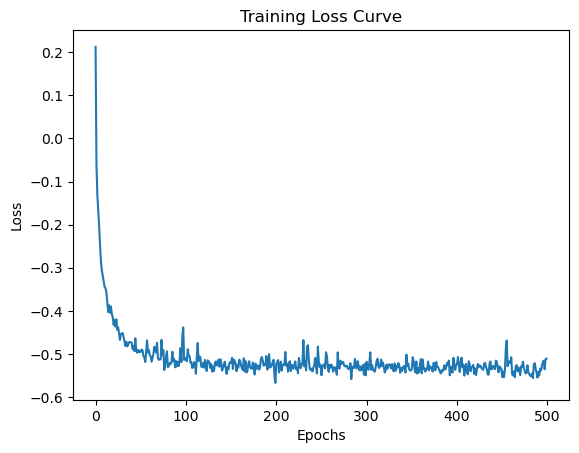

In [12]:
# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [13]:
# Generate new samples
with torch.no_grad():
    samples = model.sample(5000).cpu().numpy()

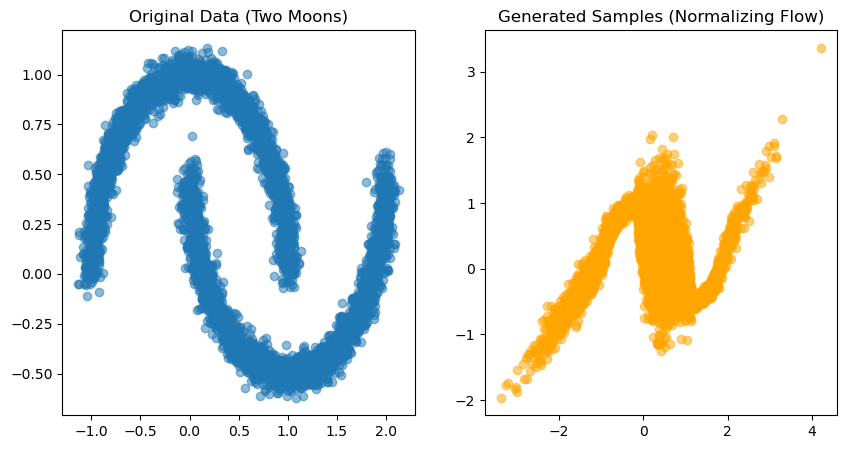

In [14]:
# Plot original data vs. generated samples
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(data.cpu()[:, 0], data.cpu()[:, 1], alpha=0.5)
ax[0].set_title("Original Data (Two Moons)")

ax[1].scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='orange')
ax[1].set_title("Generated Samples (Normalizing Flow)")

plt.show()

## Example of Normalizing Flow Using MNIST Data

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
# Load MNIST dataset using TorchVision
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten images
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [18]:
# Define Affine Coupling Layer
class AffineCouplingLayer(nn.Module):
    def __init__(self, input_dim):
        super(AffineCouplingLayer, self).__init__()
        self.scale_net = nn.Sequential(nn.Linear(input_dim // 2, 256), nn.ReLU(), nn.Linear(256, input_dim // 2), nn.Tanh())
        self.translate_net = nn.Sequential(nn.Linear(input_dim // 2, 256), nn.ReLU(), nn.Linear(256, input_dim // 2))

    def forward(self, x, reverse=False):
        x1, x2 = x.chunk(2, dim=1)
        s = self.scale_net(x1)
        t = self.translate_net(x1)
        x2 = (x2 - t) / torch.exp(s) if reverse else x2 * torch.exp(s) + t
        return torch.cat([x1, x2], dim=1), s

In [19]:
# Define Normalizing Flow Model
class NormalizingFlow(nn.Module):
    def __init__(self, input_dim, num_layers):
        super(NormalizingFlow, self).__init__()
        self.layers = nn.ModuleList([AffineCouplingLayer(input_dim) for _ in range(num_layers)])

    def forward(self, x, reverse=False):
        log_det_jacobian = 0
        for layer in (reversed(self.layers) if reverse else self.layers):
            x, s = layer(x, reverse=reverse)
            log_det_jacobian += torch.sum(s, dim=1) if not reverse else -torch.sum(s, dim=1)
        return x, log_det_jacobian

    def sample(self, num_samples):
        z = torch.randn((num_samples, 784)).to(device)
        samples, _ = self.forward(z, reverse=True)
        return samples

In [20]:
# Train Normalizing Flow
input_dim, num_layers, epochs = 784, 4, 20
model = NormalizingFlow(input_dim, num_layers).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = lambda z, log_det: torch.mean(0.5 * torch.sum(z**2, dim=1) - log_det)

losses = []
for epoch in range(epochs):
    batch_losses = []
    for batch, _ in train_loader:
        batch = batch.to(device)
        z, log_det = model(batch)
        loss = loss_fn(z, log_det)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    losses.append(np.mean(batch_losses))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}")

Epoch 1/20, Loss: -856.7831
Epoch 2/20, Loss: -954.6096
Epoch 3/20, Loss: -977.9733
Epoch 4/20, Loss: -991.6821
Epoch 5/20, Loss: -1002.5237
Epoch 6/20, Loss: -1011.8836
Epoch 7/20, Loss: -1019.5429
Epoch 8/20, Loss: -1026.0534
Epoch 9/20, Loss: -1033.0718
Epoch 10/20, Loss: -1038.1864
Epoch 11/20, Loss: -1043.5520
Epoch 12/20, Loss: -1047.9601
Epoch 13/20, Loss: -1051.6289
Epoch 14/20, Loss: -1055.9931
Epoch 15/20, Loss: -1059.2876
Epoch 16/20, Loss: -1062.8333
Epoch 17/20, Loss: -1066.0855
Epoch 18/20, Loss: -1068.6716
Epoch 19/20, Loss: -1071.4679
Epoch 20/20, Loss: -1074.1823


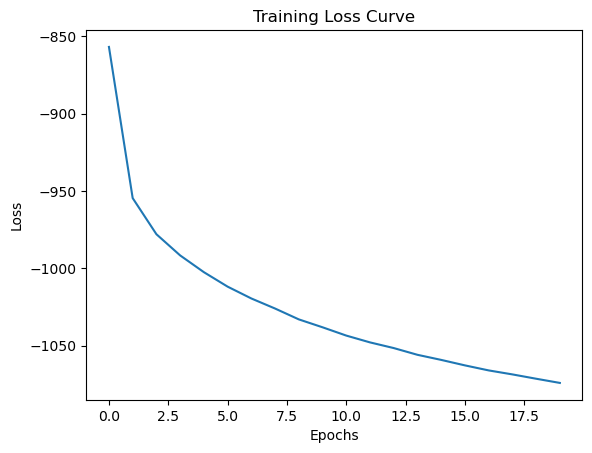

In [21]:
# Plot training loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [22]:
# Generate samples
with torch.no_grad():
    generated_samples = model.sample(25).cpu().numpy()

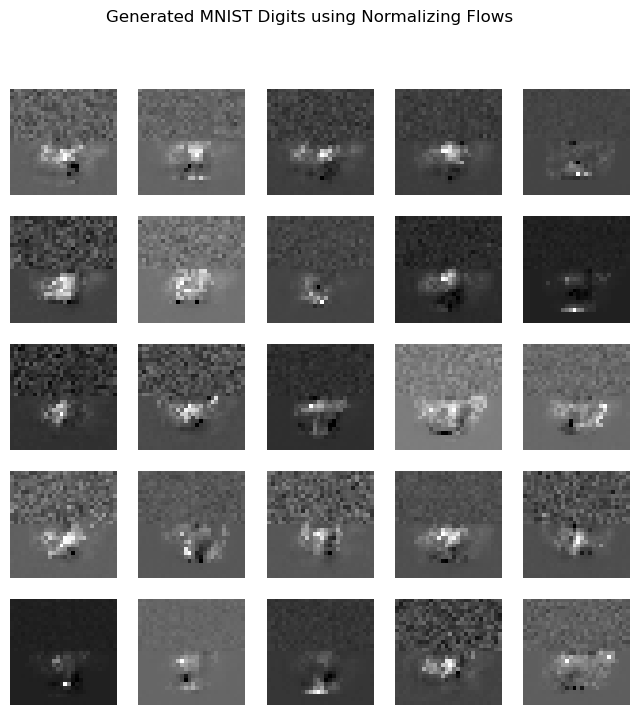

In [23]:
# Plot generated images
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Generated MNIST Digits using Normalizing Flows")
plt.show()

# Diffusion Models

Diffusion models are a class of **generative models** designed to **transform simple noise distributions into complex data distributions**. They do this through a **gradual denoising process**, where an initial noisy signal is iteratively refined into a structured output, such as an image or text.

#### Key Features of Diffusion Models
- **Probabilistic Modeling** – Models the data distribution via a **stochastic Markov process**.
- **Likelihood-Based** – Unlike GANs, diffusion models explicitly define a **probability density function**.
- **State-of-the-Art Generative Performance** – Used in cutting-edge models like **DALL·E 2, Stable Diffusion, Imagen, and Latent Diffusion Models**.

Diffusion models have been widely adopted for **image synthesis, text-to-image generation, molecular design, and speech synthesis**.

## Gradual Denoising

At the core of diffusion models is the idea of **gradual denoising**. Instead of generating data in one step, the model **starts with random noise** and progressively refines it over many small steps. To understand this process, the **forward diffusion process** corrupts data by adding noise while the **reverse diffusion process** learns to remove noise and reconstruct the data.

Overall, 
- The forward process **gradually corrupts** an image into pure noise.
- The reverse process **gradually reconstructs** an image by learning to remove noise.
- And, once trained, the model can **start from pure noise** and work to reconstruct meaningful samples.

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc22886268621d_65609f066f555009dfa850ee_ddpms.webp)

### The Forward Diffusion Process: Adding Noise

The forward process systematically **destroys structure** in the data by adding **Gaussian noise** step by step:

$$
q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{1 - \beta_t} x_{t-1}, \beta_t I)
$$

where:
- $ x_0 $ is the original data (e.g., an image from a dataset).
- $ x_t $ is the data at time step $ t $, containing progressively more noise.
- $ \beta_t $ is a small variance term controlling the noise added at each step.

#### What Happens During the Forward Process?
- **Initially, $ x_0 $ contains clear, structured data** (e.g., an image of a cat).
- At each time step $ t $, the data **loses detail** as Gaussian noise is added.
- After **T steps**, the data becomes indistinguishable from pure Gaussian noise.

We can directly sample noisy data from $ x_0 $ at any timestep $ t $ using:

$$
q(x_t | x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t} x_0, (1 - \bar{\alpha}_t) I)
$$

where:

$$
\bar{\alpha}_t = \prod_{i=1}^{t} (1 - \beta_i)
$$

This formulation allows us to **skip multiple diffusion steps at once**, making training more efficient.

### The Reverse Diffusion Process: Learning to Remove Noise

Now, we need to **reverse this process** to recover the original image.

The goal is to model:

$$
p_\theta(x_{t-1} | x_t)
$$

which represents the probability of recovering a less noisy image $ x_{t-1} $ from a noisy image $ x_t $.

Since directly inverting the forward diffusion process is intractable, we **train a neural network** to predict the noise component added at each step:

$$
\epsilon_\theta(x_t, t) \approx \epsilon
$$

Using this predicted noise, we estimate $ x_{t-1} $ as:

$$
x_{t-1} = x_t - \epsilon_\theta(x_t, t)
$$

This step-by-step denoising process gradually reconstructs the original image from pure noise.

#### What Happens During the Reverse Process?
- **Start from Gaussian noise** $ x_T $.
- At each step, the model **removes a small amount of noise** from $ x_t $.
- After **T steps**, we recover a structured sample $ x_0 $ that resembles real data.

## How Diffusion Models Are Trained

Training involves **minimizing the reconstruction error** between the true noise $ \epsilon $ and the model’s predicted noise $ \epsilon_\theta(x_t, t) $. 

The loss function is:

$$
L(\theta) = \mathbb{E}_{x_0, \epsilon, t} \left[ \|\epsilon - \epsilon_\theta(x_t, t) \|^2 \right]
$$

where:
- $ x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \epsilon $
- $\epsilon \sim \mathcal{N}(0, I) $ is random Gaussian noise.

### Steps in Training
1. **Sample** $ x_0 $ from the dataset.
2. **Select a random timestep** $ t $.
3. **Generate noisy input** $ x_t $ using the forward process.
4. **Predict noise** using $ \epsilon_\theta(x_t, t) $.
5. **Compute the loss** and update model parameters.

Once trained, we use the learned model to **denoise random noise step-by-step** and generate realistic samples.

## Example of Diffusion Model Using Synthetic Data

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
# Generate Two Moons dataset
num_samples = 5000
data, _ = make_moons(n_samples=num_samples, noise=0.1)
data = torch.tensor(data, dtype=torch.float32).to(device)

In [26]:
# Define a simple U-Net-like neural network
class SimpleDiffusionModel(nn.Module):
    def __init__(self, input_dim):
        super(SimpleDiffusionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x, t):
        return self.net(x)

In [27]:
# Define the diffusion forward process (adds noise)
def forward_diffusion(x_0, t, noise):
    alpha_t = torch.exp(-0.5 * t)
    return alpha_t * x_0 + (1 - alpha_t) * noise

In [28]:
# Define the training loop for denoising
input_dim = 2
model = SimpleDiffusionModel(input_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 500
batch_size = 128
losses = []

for epoch in range(epochs):
    perm = torch.randperm(num_samples)
    batch_losses = []

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]
        batch = data[idx].to(device)

        # Generate noisy input
        t = torch.rand(batch.shape[0], 1).to(device)  # Random timestep
        noise = torch.randn_like(batch).to(device)
        x_t = forward_diffusion(batch, t, noise)

        # Predict noise and compute loss
        pred_noise = model(x_t, t)
        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    avg_loss = np.mean(batch_losses)
    losses.append(avg_loss)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")

Epoch 0: Loss = 0.8630
Epoch 50: Loss = 0.7642
Epoch 100: Loss = 0.7826
Epoch 150: Loss = 0.7601
Epoch 200: Loss = 0.7619
Epoch 250: Loss = 0.7437
Epoch 300: Loss = 0.7587
Epoch 350: Loss = 0.7727
Epoch 400: Loss = 0.7370
Epoch 450: Loss = 0.7633


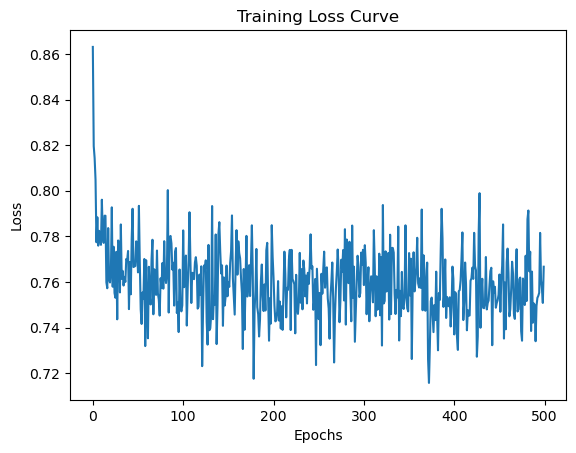

In [29]:
# Plot training loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [30]:
# Generate samples using reverse diffusion
def sample_diffusion(model, num_samples, steps=100):
    x = torch.randn((num_samples, 2)).to(device)  # Start from Gaussian noise
    for i in range(steps):
        t = torch.full((num_samples, 1), 1 - (i / steps)).to(device)
        noise_pred = model(x, t)
        x = x - noise_pred / steps  # Gradual denoising
    return x

with torch.no_grad():
    samples = sample_diffusion(model, 5000).cpu().numpy()

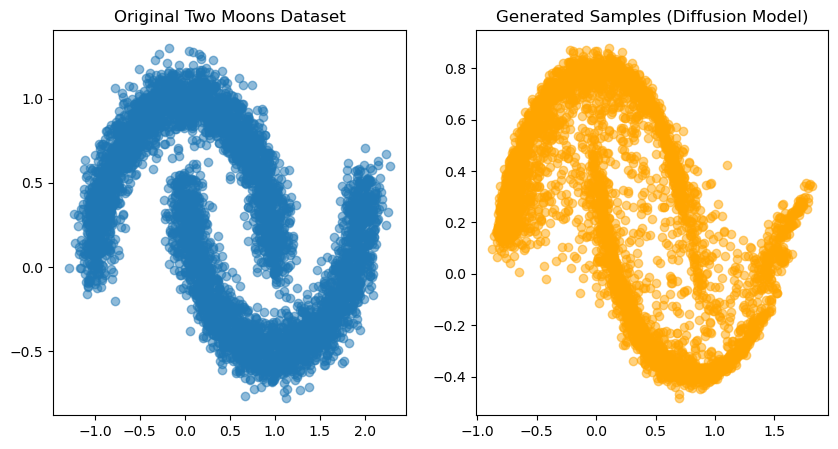

In [31]:
# Plot original vs. generated samples
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data.cpu()[:, 0], data.cpu()[:, 1], alpha=0.5)
ax[0].set_title("Original Two Moons Dataset")

ax[1].scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='orange')
ax[1].set_title("Generated Samples (Diffusion Model)")

plt.show()

## Example of Diffusion Model Using MNIST Data

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
# Load MNIST dataset using TorchVision
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten images
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [14]:
# Define Diffusion Model
class DiffusionModel(nn.Module):
    def __init__(self, input_dim):
        super(DiffusionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def forward(self, x, t):
        return self.net(x)

In [15]:
# Initialize model and optimizer
input_dim = 784  # 28x28 images flattened
model = DiffusionModel(input_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [16]:
# Training loop
epochs = 20
losses = []

for epoch in range(epochs):
    batch_losses = []
    for batch, _ in train_loader:
        batch = batch.to(device)
        t = torch.rand(batch.shape[0], 1).to(device)  # Random timestep
        noise = torch.randn_like(batch).to(device)
        x_t = batch * torch.sqrt(1 - t) + noise * torch.sqrt(t)

        pred_noise = model(x_t, t)
        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    losses.append(np.mean(batch_losses))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}")

Epoch 1/20, Loss: 0.7299
Epoch 2/20, Loss: 0.5952
Epoch 3/20, Loss: 0.5800
Epoch 4/20, Loss: 0.5768
Epoch 5/20, Loss: 0.5747
Epoch 6/20, Loss: 0.5739
Epoch 7/20, Loss: 0.5731
Epoch 8/20, Loss: 0.5726
Epoch 9/20, Loss: 0.5715
Epoch 10/20, Loss: 0.5716
Epoch 11/20, Loss: 0.5706
Epoch 12/20, Loss: 0.5703
Epoch 13/20, Loss: 0.5700
Epoch 14/20, Loss: 0.5693
Epoch 15/20, Loss: 0.5695
Epoch 16/20, Loss: 0.5689
Epoch 17/20, Loss: 0.5688
Epoch 18/20, Loss: 0.5693
Epoch 19/20, Loss: 0.5682
Epoch 20/20, Loss: 0.5684


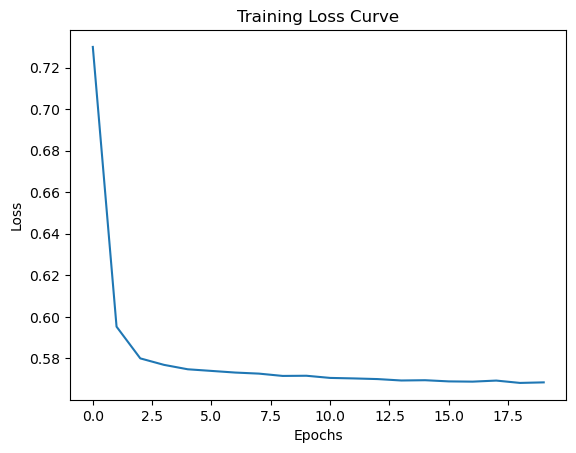

In [17]:
# Plot training loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [18]:
# Generate samples
def sample_diffusion(model, num_samples, steps=100):
    x = torch.randn((num_samples, 784)).to(device)  # Start with pure noise
    for i in range(steps):
        t = torch.full((num_samples, 1), 1 - (i / steps)).to(device)
        noise_pred = model(x, t)
        x = x - noise_pred / steps  # Gradual denoising
    return x

with torch.no_grad():
    generated_samples = sample_diffusion(model, 25).cpu().numpy()

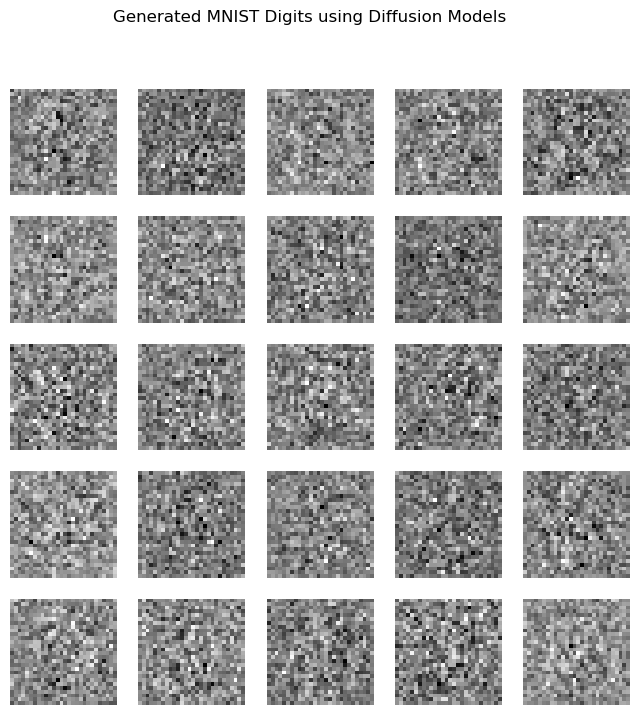

In [19]:
# Plot generated images
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Generated MNIST Digits using Diffusion Models")
plt.show()

## Diffusion Model Architectures

Different architectures are used to implement the neural network $ \epsilon_\theta(x_t, t) $. 

The most common is **U-Net**, but other variants exist.

### 1. U-Net for Diffusion Models

U-Net is a **convolutional neural network (CNN)** designed for image processing tasks, especially in segmentation and denoising. It is widely used in diffusion models.

#### U-Net Structure
- **Encoder Path (Contracting Path)**: Extracts hierarchical features using **convolutions and downsampling**.
- **Bottleneck**: Captures compressed feature representations.
- **Decoder Path (Expanding Path)**: Uses **upsampling and skip connections** to reconstruct the output.

#### Why U-Net?
- **Skip connections** allow for **information flow from high-resolution to low-resolution layers**, preserving fine-grained details.
- Works efficiently with **multi-scale features**, which is crucial for generating high-resolution images.
- Originally used for **medical image segmentation**, but adapted for **denoising and generative modeling**.

<img src="https://miro.medium.com/v2/resize:fit:920/1*W-RkwGIiKDF3A3WXwZQMWg.png" alt="Description" width="500">

### 2. Time-Conditioned Transformers

Recent diffusion models, like **Imagen and Stable Diffusion**, incorporate **transformer-based architectures** instead of CNNs.

#### How Transformers Improve Diffusion Models
- **Self-attention mechanisms** help model **long-range dependencies**.
- **Cross-attention** allows conditioning on text, enabling **text-to-image generation** (e.g., **DALL·E 2**).
- **Memory-efficient architectures** allow handling **high-resolution images**.

### 3. Latent Diffusion Models (LDMs)

Latent Diffusion Models (LDMs), like **Stable Diffusion**, introduce an additional step:

1. **Encode images into a low-dimensional latent space** using an autoencoder.
2. **Apply diffusion in this latent space** instead of pixel space.
3. **Decode the latent representation back into an image**.

This reduces the computational cost **without sacrificing quality**.

# Stable Diffusion

**Stable Diffusion** is a text-to-image generative model that creates images from textual descriptions. It is based on Diffusion Models, which gradually transform noise into meaningful images using a learned denoising process.

### How Does Stable Diffusion Work?

1. Input a text prompt (e.g., "A futuristic city at sunset").
2. Convert the text into a numerical representation using a pre-trained language model (like CLIP).
3. Start with pure noise and apply the diffusion process step by step to generate an image.
4. Iteratively remove noise using a trained neural network until a coherent image appears.

#### Resource

[Stable Diffusion Google Colab Notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb)

# MidJourney

**MidJourney** is an AI-powered image generation tool similar to Stable Diffusion but runs as a Discord-based service. 

Unlike Stable Diffusion, MidJourney:

- Uses proprietary diffusion models trained on large datasets.
- Has an easy-to-use interface where users type prompts in Discord.
- Supports style transfer and advanced fine-tuning.

### How Does MidJourney Work?

1. Users type /imagine in the MidJourney Discord bot.
2. The model interprets the prompt and starts generating images.
3. It provides four image variations based on the prompt.
4. Users can upscale or modify selected images.
5. The final output is a high-resolution AI-generated image.

#### Resource

[MidJourney Quickstart Guide](https://docs.midjourney.com/hc/en-us/articles/33329261836941-Getting-Started-Guide)

# DALLE

**DALL·E** is OpenAI's text-to-image model, similar to MidJourney but available via API. It allows users to generate AI-created images programmatically.

### How Does DALL·E Work?
1. The text prompt is sent to OpenAI’s DALL·E API.
2. The model generates an image based on the description.
3. The API returns a URL, from which the image can be downloaded and displayed.

### Simple Example of Using DALL-E

In [20]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO

api_key=''

# Set up OpenAI client
client = OpenAI(api_key=api_key)

# Define a text prompt
prompt = "A futuristic city with flying cars and neon lights, cyberpunk style"

# Generate an image using OpenAI's DALL·E API
response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
)

# Get the image URL
image_url = response.data[0].url

# Download and display the generated image
image_response = requests.get(image_url)
image = Image.open(BytesIO(image_response.content))
image.show()

In [ ]:
image.show()

![](DALLEExample.png)

![](DALLE2.png)